In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error , f1_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
data = pd.read_csv('data/stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,standard,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = data.drop(columns=['math_score'],axis=1)
y = data['math_score']

In [5]:
num_data = X.select_dtypes(exclude='object').columns
cat_data = X.select_dtypes(include='object').columns

In [6]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [7]:
num_transform = StandardScaler()
cat_transform = OneHotEncoder()

preproccess = ColumnTransformer([
    ('OneHotEncoder',cat_transform,cat_data),
    ('StandardScaler',num_transform,num_data)
])

In [ ]:
X = preproccess.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [10]:
X_ = pd.DataFrame(X)
X_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.044215,1.774157
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.970952,-0.859491
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.125472,-0.201079
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.605158,0.589015


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
def evaluat_model(a,b):
    mae = mean_absolute_error(a,b)
    mse = mean_squared_error(a,b)
    rmse = root_mean_squared_error(a,b)
    r2 = r2_score(a,b)
    return mae,mse,rmse,r2

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(n_estimators=100, max_depth=5), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
models_list=[]
r2_list=[]

for name,model in models.items():
    train_model = model.fit(X_train,y_train)    
    y_pred = train_model.predict(X_test)
    
    print(f"{name} Accuracy : ")
    mae , mse ,rmse ,r2 = evaluat_model(y_test,y_pred)
    print("MSE : ",mse)
    print("r2_score : ",r2)
    # print(f1_score(y_test,y_train))
    print()

Linear Regression Accuracy : 
MSE :  29.081572227186207
r2_score :  0.8804891779218315

Lasso Accuracy : 
MSE :  42.558198094074925
r2_score :  0.8251069371127824

Ridge Accuracy : 
MSE :  29.040203575167975
r2_score :  0.8806591825409883

K-Neighbors Regressor Accuracy : 
MSE :  52.90259999999999
r2_score :  0.7825965815506307

Decision Tree Accuracy : 
MSE :  58.98
r2_score :  0.7576214851416793

Random Forest Regressor Accuracy : 
MSE :  37.10020041087964
r2_score :  0.8475365975494223

XGBRegressor Accuracy : 
MSE :  40.93837356567383
r2_score :  0.8317636251449585

CatBoosting Regressor Accuracy : 
MSE :  36.25545230655922
r2_score :  0.851008092818235

AdaBoost Regressor Accuracy : 
MSE :  36.928922637311096
r2_score :  0.8482404641548104



reading_score: 0.556
writing_score: 0.239
gender_female: 0.054
gender_male: 0.068
race_ethnicity_group A: 0.003
race_ethnicity_group B: 0.005
race_ethnicity_group C: 0.006
race_ethnicity_group D: 0.006
race_ethnicity_group E: 0.009
parental_level_of_education_associate's degree: 0.006
parental_level_of_education_bachelor's degree: 0.005
parental_level_of_education_high school: 0.006
parental_level_of_education_master's degree: 0.002
parental_level_of_education_some college: 0.007
parental_level_of_education_some high school: 0.004
lunch_free/reduced: 0.008
lunch_standard: 0.007
test_preparation_course_completed: 0.006
test_preparation_course_none: 0.005


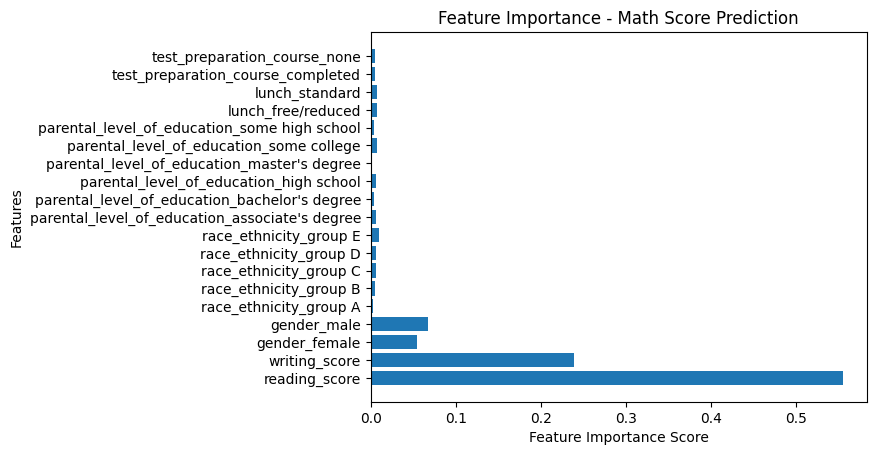

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load your dataset
df = data

# X: all features except output, y: output feature (math_score)
X = df.drop(columns=["math_score"])
y = df["math_score"]
X = pd.get_dummies(X)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Print importances
for name, imp in zip(feature_names, importances):
    print(f"{name}: {imp:.3f}")

# Plot feature importances
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Math Score Prediction")
plt.show()
